# Heart Attack Prediction 

1. Introduction

    * Dataset Overview 
    * Understanding the problem 
    * Identifying a clear use case
&NewLine; 

2. Preparing data 

    * Importing the dataset
    * Exploratory Data Analysis
    * Standardization and Feature Engineering  
&NewLine; 

3. Model Building

    * Splitting data
    * Building Baseline: Define the desired results 
    * Iterating Model: Try and test
    * Evaluating performance
&NewLine; 

4. Communicate Results 

    * Prepare a report  in pdf

---

# Introduction 

## Dataset Overview 

The Heart Attack Dataset ([License CC0: Public Domain](https://creativecommons.org/publicdomain/zero/1.0/)) offers a comprehensive collection of medical attributes designed to aid in the prediction of heart-related conditions. It consists of various clinical and demographic factors that play a significant role in assessing a patient's cardiovascular health. 

### Attributes

1. **Age:** The age of the patient is recorded in years. Age is a crucial factor in determining the risk of cardiovascular diseases, as older individuals are generally more susceptible.

2. **Sex:** This attribute signifies the patient's biological sex, with values denoting:

    - 1: Male
    - 0: Female
    
    Gender can be a factor influencing heart health and response to treatment.
&NewLine; 

3. **Chest Pain Type (cp):** This categorical attribute classifies chest pain into four types:

   - 0: Typical Angina
   - 1: Atypical Angina
   - 2: Non-Cardiac Chest Pain
   - 3: Asymptomatic
   
   The type of chest pain a patient experiences provides valuable diagnostic insights for heart conditions.
&NewLine; 

4. **Resting Blood Pressure (trtbps):** Recorded in mmHg, this attribute indicates the patient's resting blood pressure. Blood pressure is a key indicator of cardiovascular health, and abnormal values can point towards underlying issues.

5. **Cholesterol (chol):** Measured in mg/dl, this value is obtained using a BMI sensor. Cholesterol levels are closely linked to heart health, and elevated levels may suggest an increased risk of heart diseases.

6. **Fasting Blood Sugar (fbs):** This binary attribute determines if the patient's fasting blood sugar is above 120 mg/dl:

   - 1: True (High fasting blood sugar)
   - 0: False (Normal fasting blood sugar)
   
   High fasting blood sugar levels can be indicative of insulin resistance and metabolic disorders.
&NewLine; 

7. **Resting Electrocardiographic Results (restecg):** This categorical attribute evaluates resting electrocardiographic readings:

   - 0: Normal
   - 1: ST-T Wave Normality
   - 2: Left Ventricular Hypertrophy
   
   
   The resting ECG findings provide insights into the heart's electrical activity and structural health.
&NewLine; 

8. **Maximum Heart Rate Achieved (thalachh):** Represented as beats per minute (bpm), this attribute indicates the patient's maximum heart rate during exercise. It's a valuable measure of cardiovascular fitness.

9. **Previous Peak (oldpeak):** This attribute reflects the ST depression induced by exercise relative to rest. It can signify the presence of coronary artery disease.

10. **Slope (slp):** This attribute describes the slope of the peak exercise ST segment:

    - 0: Positive
    - 1: Flat
    - 2: Negative
    
    The slope can provide information about changes in the heart's electrical activity during exercise.
&NewLine; 

11. **Number of Major Vessels (caa):** The count of major blood vessels colored by fluoroscopy. It's an indicator of blood supply to the heart.

12. **Thallium Stress Test Result (thall):** Represented by values between
    - 0:‌ Normal blood flow
    - 1: Abnormal blood flow during exercise
    - 2: Low blood flow during both rest and exercise
    - 3: No thallium visible in parts of the heart
    
    this attribute categorizes the outcome of the Thalium Stress Test.
&NewLine; 

13. **Exercise Induced Angina (exng):** Binary attribute denoting whether exercise induced angina:
    - 1: Yes
    - 0: No
    
    The presence of angina during exercise can indicate underlying heart conditions.
&NewLine; 

14. **Output (target variable):** This binary attribute serves as the target variable for predictive modeling. It indicates 
    - 1: presence
    - 0: absence
    
    of a heart-related condition.
    
## Problem
Building an automated, ML-based procedure for early diagnosis and assessment of cardiovascular conditions can significantly help in patient care. Cardiovascular diseases are a leading cause of mortality worldwide, highlighting the immediacy for innovative solutions. Machine learning is able to generalize vast datasets and identify patterns in complex problems. By integrating ML algorithms with medical data, healthcare professionals can detect anomalies and assess risk factors long before symptoms are detected. This early intervention enables timely treatment, reducing the severity of conditions and accelerating patient recovery. Moreover, it can optimize healthcare processes, making them faster and cost-effective. Building such a system is an important step towards enhancing the quality of healthcare.

## Usecase
*In the current project, I aim to explore the dataset and build a model with an accuracy of more than 95% to predict a heart-related condition based on the provided clinical and demographic factors. I also try to use fewer factors to reach the same accuracy, which can be valuable for the price reduction of the early diagnosis.*


# Preparing data 

## Importing


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_formats=['svg']


In [12]:
palette = "Paired"

# this is to show how many unique values are present in each column
def get_unique_values(data):
    dict = {}
    for i in list(data.columns):
        dict[i] = data[i].value_counts().shape[0]

    return pd.DataFrame(dict,index=["unique count"]).transpose()

def get_missing_values(data):
    return pd.DataFrame(df.isnull().sum()).rename(columns={0: "missing_values"})

# this is to visualize the distribution of numeric columns
def plot_continuous_distribution(
    data: pd.DataFrame = None, 
    column: str = None, 
    height: int = 7):

    g = sns.displot(data, x=column, kde=True).set(title=f"Distribution of {column}", ylabel="Frequency");


# this is to visualise the distribution of categorical columns
def plot_categorical_distribution(
    data: pd.DataFrame = None, 
    column: str = None,
    kind: str='count', 
    palette: str=palette
):

    g = sns.catplot(data=data, x=column, kind=kind,  palette=palette).set(title=f"Distribution of {column}", ylabel="Frequency" );

#this is to plot the correlations between the numeric columns within the data  
def correlation_plot(data: pd.DataFrame = None):
    corr = df.corr(numeric_only=True)
    sns.heatmap(corr, cmap='Blues');


In [5]:
df = pd.read_csv("data/heart.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


The dataset consists of 303 observations (unique patients) and 14 features (medical conditions). 

## Exploratory Data Analysis

Let's summarize and visualize the provided measurement results to understand the behavior of the clinical and demographic factors and their correlation to the heart-related condition. 

### Univariate Analysis

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trtbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalachh,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exng,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [7]:
get_missing_values(df)

,missing_values
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


There are no missing values in the dataset. 

In [8]:
get_unique_values(df)

,unique count
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


From 13 features, 5 features are numerical, and 8 features are categorical.  

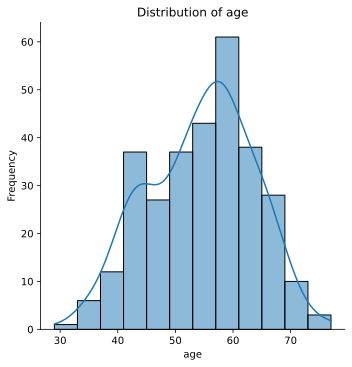

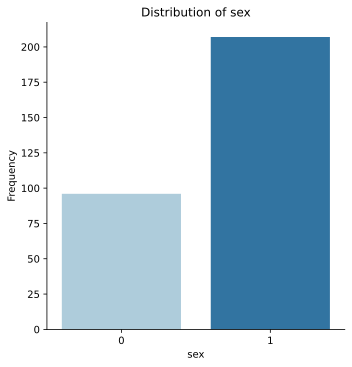

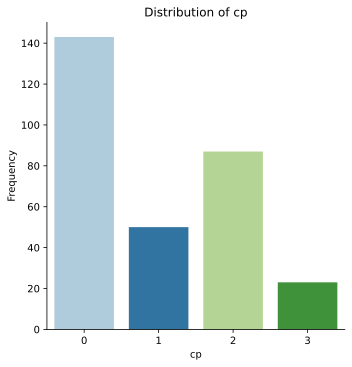

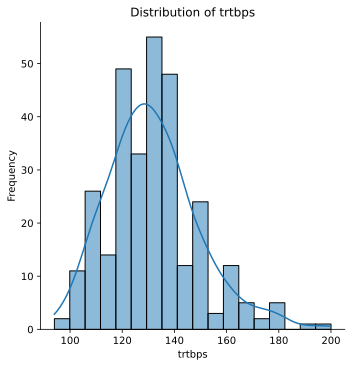

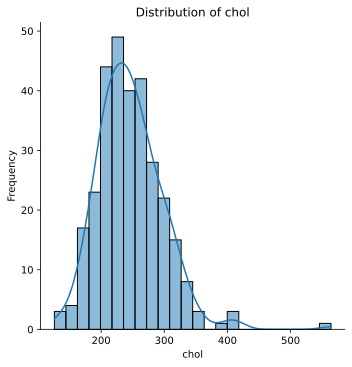

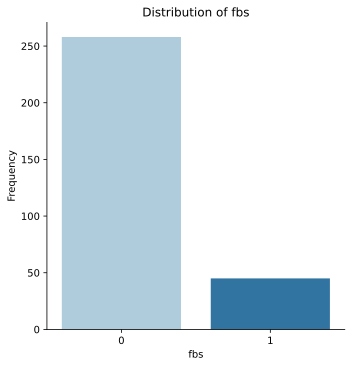

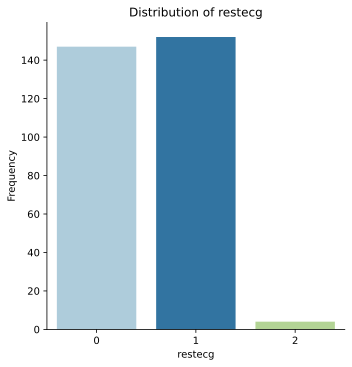

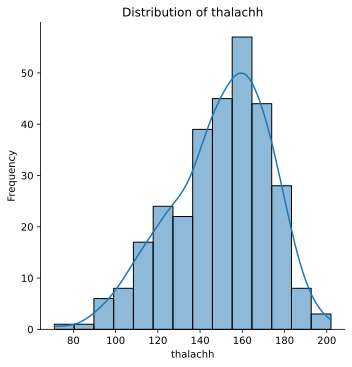

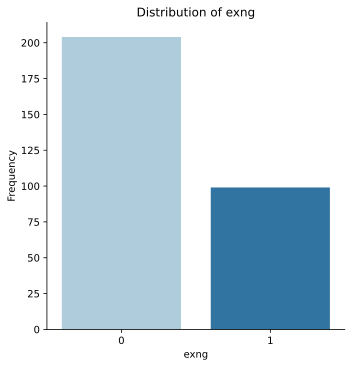

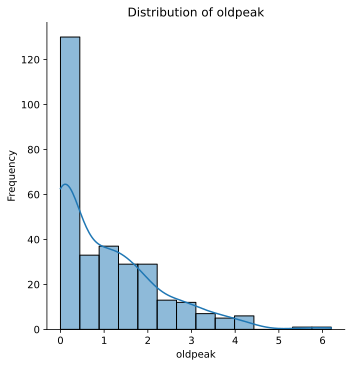

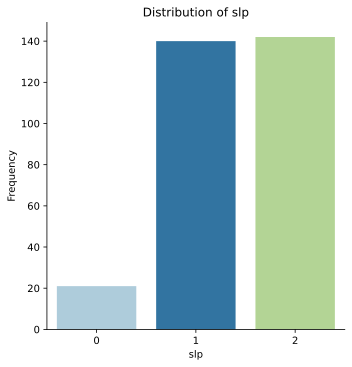

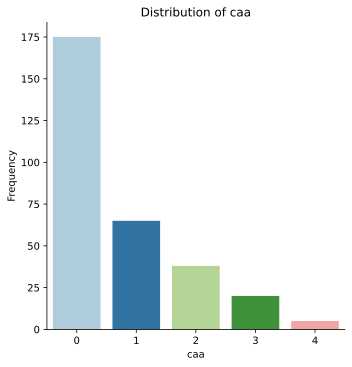

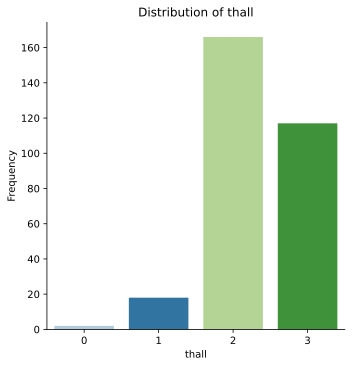

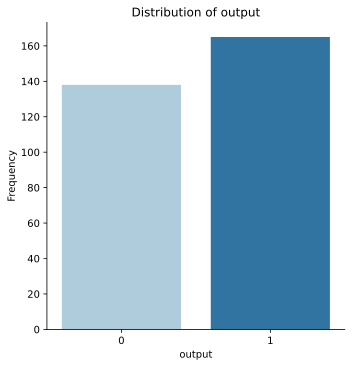

In [13]:
numerical_features = ["age", "trtbps" , "chol", "thalachh", "oldpeak"]

for col in df.columns:
    if col in numerical_features:
        plot_continuous_distribution(df, col) 
    else:
        plot_categorical_distribution(df, col)

* The distribution of the age is close to the normal one. Minimum age is 29 years, maximum is 77 years. 
*  The "female" is twice less presented in the dataset than the "male" patients. 
* The most frequent chest pain is a typical angina ("0").
* The resting blood pressure ("trtbps") distribution is positively skewed.
* Cholesterol ("chol") level measurements have outliers. Maximum value is 564. 
* More than 80% of patients have normal fasting blood sugar level. 
* Left ventricular hypertrophy is almost absent in resting electrocardiographic results ("restecg"). Most of the patients have ST-T wave normality.
* Maximum heart rate achieved ("thalachh") distribution is negatively skewed.
* Exercise-induced angina ("exng") occurs half as often as its absence. 
* Previous Peak ("oldpeak") is exponentially distributed.
* Positive slope ("slp") of the peak exercise ST segment occurs less than in 10% of cases. 
* The most frequent number of major vessels ("caa") is 0. 
* The most common result in the thallium stress test ("thall") is "2," indicating low blood flow during both rest and exercise, followed by "3," which signifies the absence of thallium in certain areas of the heart.
* The ratio between categories of the target variable "output" (presence of a heart-related condition) is quite balanced.


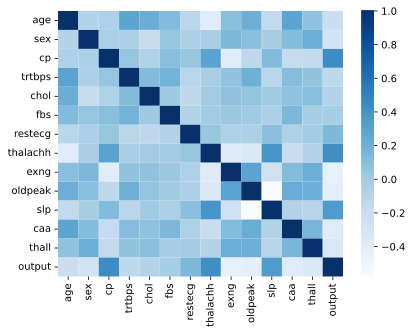

In [42]:
correlation_plot(df)

* There is a weak negative correlation between "slp" and "oldpeak" and a moderate positive correlation between "slp" and "thalachh". 

* The most significant correlation with the "output" attents for "cp", "slp", and "thalachh"  features.

### Bivariate Analysis

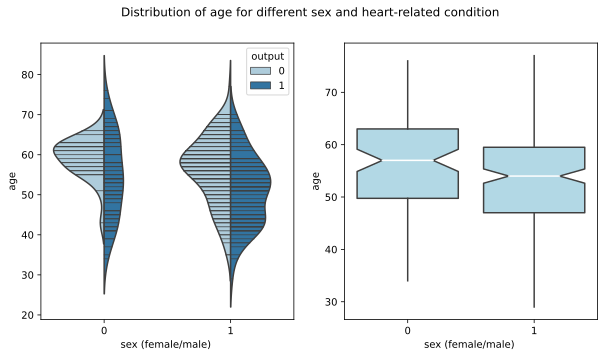

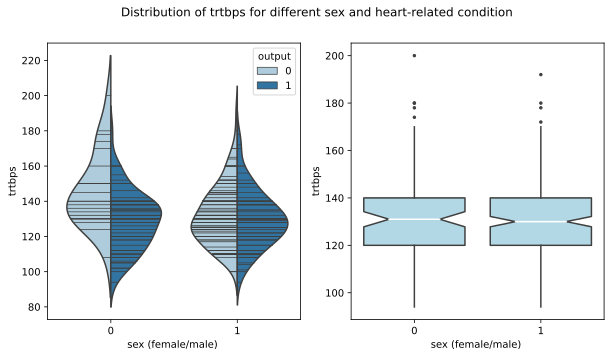

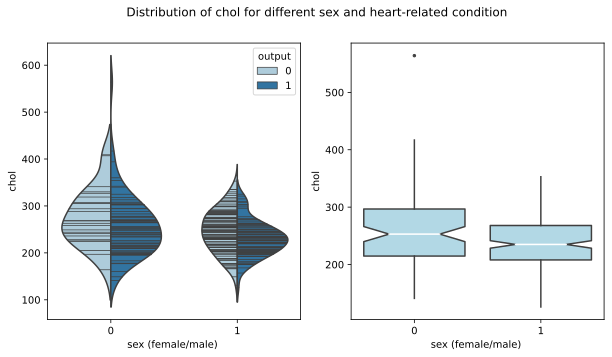

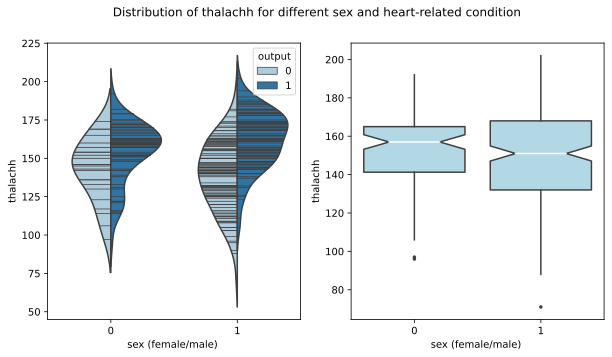

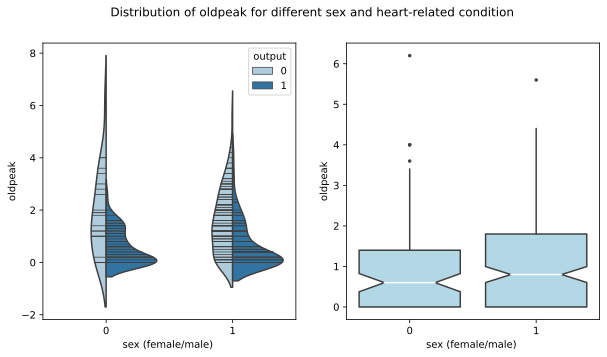

In [35]:

for n in range(len(numerical_features)):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'Distribution of {numerical_features[n]} for different sex and heart-related condition')
    sns.violinplot(
        data=df, 
        x="sex", 
        y=numerical_features[n], 
        hue="output", 
        inner="stick",  
        split=True, 
        ax=axes[0],
        palette=palette).set(xlabel="sex (female/male) ")
    
    sns.boxplot(
        data=df, 
        x="sex",
        y=numerical_features[n],
        notch=True,
        showcaps=False,
        flierprops={"marker": "."},
        boxprops={"facecolor": (.4, .7, .8, .5)},
        medianprops={"color": "white"},
        ax=axes[1]).set(xlabel="sex (female/male) ")
    plt.show()

* On average, female patients in the dataset tend to be older than male patients. Furthermore, there are significant differences in the distributions of heart-related conditions between female and male patients.
* The resting blood pressure ("trtbps") distribution is the same for different sex
* Female patients have higher variance and median cholesterol ("chol") level measurements 
* The presence of heart-related conditions significantly changes the distribution of maximum heart rate achieved ("thalachh"): it is more negatively skewed.
* The variance of the previous peak ("oldpeak") shrinks in the presence of heart-related conditions.

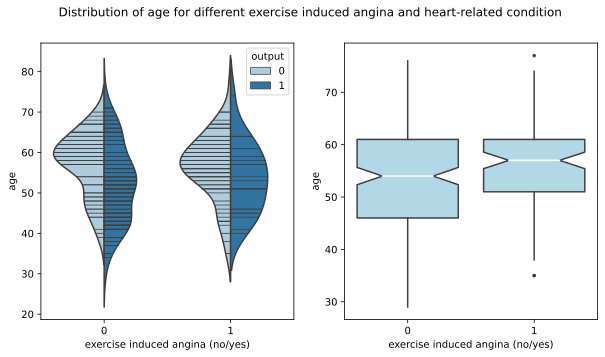

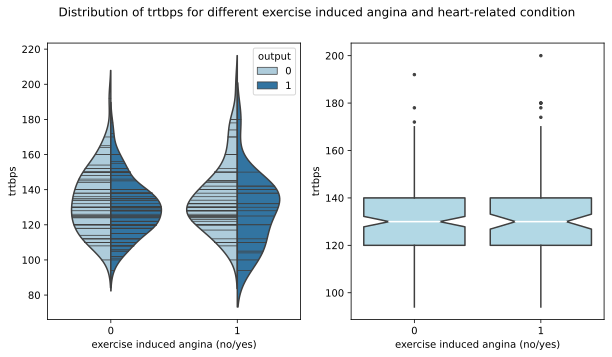

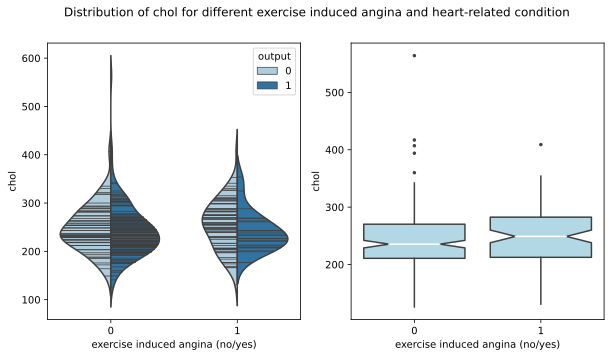

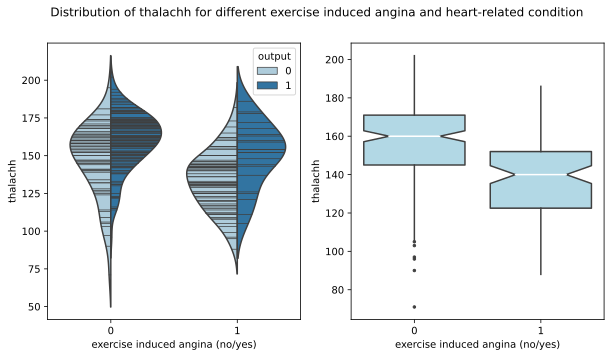

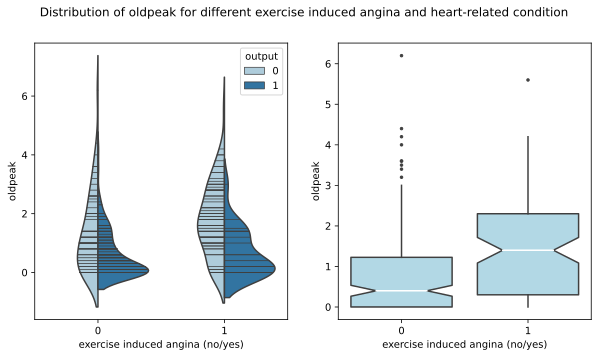

In [43]:
for n in range(len(numerical_features)):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    fig.suptitle(f'Distribution of {numerical_features[n]} for different exercise induced angina and heart-related condition')
    sns.violinplot(
        data=df, 
        x="exng", 
        y=numerical_features[n], 
        hue="output", 
        inner="stick",  
        split=True, 
        ax=axes[0],
        palette=palette).set(xlabel="exercise induced angina (no/yes)")
    
    sns.boxplot(
        data=df, 
        x="exng",
        y=numerical_features[n],
        notch=True,
        showcaps=False,
        flierprops={"marker": "."},
        boxprops={"facecolor": (.4, .7, .8, .5)},
        medianprops={"color": "white"},
        ax=axes[1]).set(xlabel="exercise induced angina (no/yes)")
    plt.show()

* The presence of heart-related conditions can be detected at any age (the distribution of age has a big variance compared with the age distribution of patients in the absence of heart-related conditions). 
* The resting blood pressure ("trtbps") distribution is not changed by the presence of exercise-induced angina.
* The presence of exercise-induced angina is related to a lower median of maximum heart rate achieved ("thalach").
* The median of the previous peak ("oldpeak") rises in the presence of exercise-induced angina.

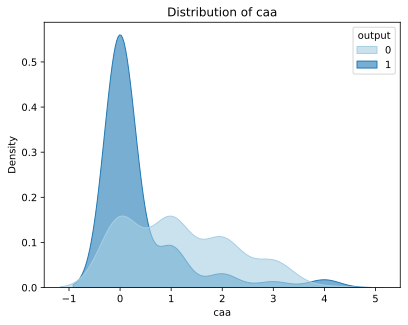

In [14]:
feat_name = "caa"
sns.kdeplot(data=df, x=feat_name, hue="output", fill=True, palette=palette, alpha=.6).set(title=f"Distribution of {feat_name}");


* The presence of heart-related conditions is related to a "0" number of major vessels ("caa").

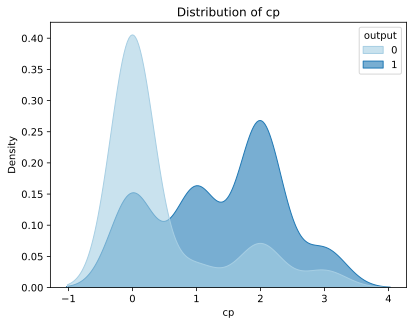

In [15]:
feat_name = "cp"
sns.kdeplot(data=df, x=feat_name, hue="output", fill=True, palette=palette, alpha=.6).set(title=f"Distribution of {feat_name}");


*  Typical angina ("0") in chest pain type ("cp") can often be encountered in healthy patients. The most frequent pain type associated with the presence of heart conditions is non-cardiac chest pain ("2").   


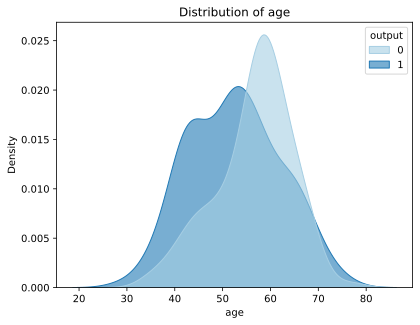

In [47]:
feat_name = "age"
sns.kdeplot(data=df, x=feat_name, hue="output", fill=True, palette=palette, alpha=.6).set(title=f"Distribution of {feat_name}");

* In this dataset, heart-related conditions are associated with younger patients compared to those without heart-related conditions  (Selection Bias Alert!) 

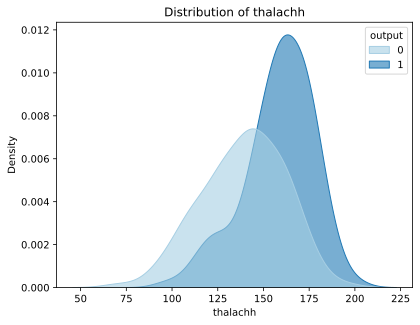

In [48]:
feat_name = "thalachh"
sns.kdeplot(data=df, x=feat_name, hue="output", fill=True, palette=palette, alpha=.6).set(title=f"Distribution of {feat_name}");


Patients with higher "thalachh" are more likely to have heart attack. 

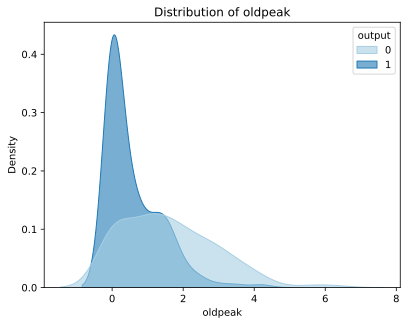

In [49]:
feat_name = "oldpeak"
sns.kdeplot(data=df, x=feat_name, hue="output", fill=True, palette=palette, alpha=.6).set(title=f"Distribution of {feat_name}");


### Conclusions from Exploratory Data Analysis

Here is an overview of the most important dataset's characteristics and relationships:

1. The dataset does not have missing values but contains outliers. 
2. The age distribution in the dataset closely resembles a normal distribution, ranging from 29 to 77 years. Younger patients have higher chance of heart attack. 
3. There are twice as many male patients as female patients in the dataset. Female patients tend to be older on average than male patients in the dataset. There is a notable difference in heart attack risk between genders.
4. The most common chest pain type is typical angina ("0"). Typical angina ("0") is common even in healthy patients, while non-cardiac chest pain ("2") is most frequently associated with heart attacks.
5. Cholesterol measurements have outliers, with a maximum value of 564. Female patients exhibit higher variance and median cholesterol levels.
6. Over 80% of patients have normal fasting blood sugar levels.
7. 2/3 of patients have exercise-induced angina in the dataset. Patients with exercise-induced angina have a lower maximum heart rate on average.
8. Patients with lower previous peak have significantly more chances of heart attacks. 
9. Patients rarely have left ventricular hypertrophy in resting electrocardiographic results, with most patients having normal ST-T waves.
11. Heart attacks are strongly associated with a lower number of major vessels.
12. Patients with higher maximum heart rate are more likely to have heart attack 
13. The most significant correlation with the "output" attents for "cp", "slp", and "thalachh" features.

Note: Probably, there is a coverage bias in this dataset. 

## Standardization and Feature Engineering


In [57]:
from sklearn.preprocessing import StandardScaler #RobustScaler

In [58]:
numerical_features = ["age", "trtbps" , "chol", "thalachh", "oldpeak"]
categorical_features = [ i for i in df.columns  if i not in numerical_features and i != "output"]

# Prepare the categorical features
df = pd.get_dummies(df, columns = categorical_features)



# Standardization numerical features 
scaler = StandardScaler()

df[numerical_features] = scaler.fit_transform(df[numerical_features])

df.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


In [60]:
# Export the result 
df.to_csv("data/preprocessed_heart.csv", index=False)

In [71]:
# Read it back

df = pd.read_csv("data/preprocessed_heart.csv")
df.head()

,age,trtbps,chol,thalachh,oldpeak,output,sex_0,sex_1,cp_0,cp_1,...,slp_2,caa_0,caa_1,caa_2,caa_3,caa_4,thall_0,thall_1,thall_2,thall_3
0,0.952197,0.763956,-0.256334,0.015443,1.087338,1,False,True,False,False,...,False,True,False,False,False,False,False,True,False,False
1,-1.915313,-0.092738,0.072199,1.633471,2.122573,1,False,True,False,False,...,False,True,False,False,False,False,False,False,True,False
2,-1.474158,-0.092738,-0.816773,0.977514,0.310912,1,True,False,False,True,...,True,True,False,False,False,False,False,False,True,False
3,0.180175,-0.663867,-0.198357,1.239897,-0.206705,1,False,True,False,True,...,True,True,False,False,False,False,False,False,True,False
4,0.290464,-0.663867,2.082050,0.583939,-0.379244,1,True,False,True,False,...,True,True,False,False,False,False,False,False,True,False


# Model Building

## Splitting data
Building Baseline: Define the desired results
Iterating Model: Try and test
Evaluating performance

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
#random_state=42 is needed for reproducibility 

target = "output"
X = df.drop(columns=target)
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape) 

X_train shape: (242, 30)
y_train shape: (242,)
X_test shape: (61, 30)
y_test shape: (61,)


## Building Baseline

Here I will define the simplest __baseline model__. It gives the most naive prediction and the reference, which a more advanced model must beat.

The reasonable metric for a classification problem is __accuracy__, which is simply

$$ \frac{\text{number of correct observations}}{\text{number of observations}}$$

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
acc_baseline = y_train.value_counts(normalize=True).max() 
print("Baseline Accuracy:", round(acc_baseline, 2)) 

Baseline Accuracy: 0.55


## Iterating Model 

### Implementation of logistic regression

In [65]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report

In [66]:
# Build model
model_logreg = LogisticRegression()

# Fit model to training data
model_logreg.fit(X_train, y_train)


LogisticRegression()

### Implementation of Support Vector Machines

In [73]:
from sklearn.svm import SVC

In [74]:
# Build model
model_svc = SVC(kernel='linear', C=1, random_state=42)

# Fit model to training data
model_svc.fit(X_train,y_train)


SVC(C=1, kernel='linear', random_state=42)

## Evaluating performance

### Results for Logistic Regression model

In [68]:
# For train and test data
acc_train = accuracy_score(y_train, model_logreg.predict(X_train))
acc_test = accuracy_score(y_test, model_logreg.predict(X_test))


print("Baseline Accuracy:", round(acc_baseline, 2)) 
print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Baseline Accuracy: 0.55
Training Accuracy: 0.88
Test Accuracy: 0.89


In [69]:
print(classification_report(y_test, model_logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88        29
           1       0.90      0.88      0.89        32

    accuracy                           0.89        61
   macro avg       0.88      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



### Results for Support Vector Machines model

In [75]:
# For train and test data
acc_train = accuracy_score(y_train, model_svc.predict(X_train))
acc_test = accuracy_score(y_test, model_svc.predict(X_test))


print("Baseline Accuracy:", round(acc_baseline, 2)) 
print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Baseline Accuracy: 0.55
Training Accuracy: 0.88
Test Accuracy: 0.87


In [76]:
print(classification_report(y_test, model_svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87        29
           1       0.90      0.84      0.87        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

